In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('./data/titanik.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lester, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.drop('Name', axis=1, inplace=True)

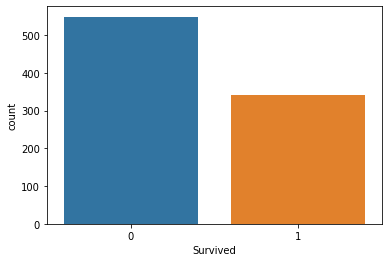

In [7]:
sns.countplot(data['Survived']);

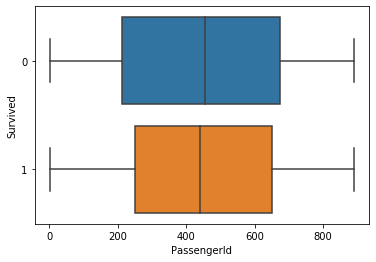

In [8]:
sns.boxplot(data['PassengerId'], data['Survived'], orient='h');

In [9]:
data['Pclass'].nunique()

3

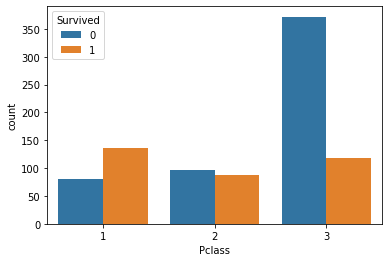

In [10]:
sns.countplot(data['Pclass'], hue=data['Survived']);

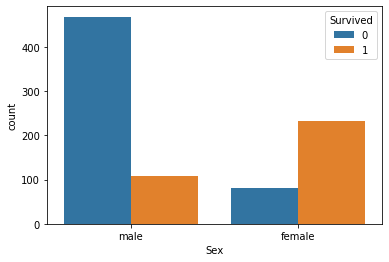

In [11]:
sns.countplot(data['Sex'], hue=data['Survived']);

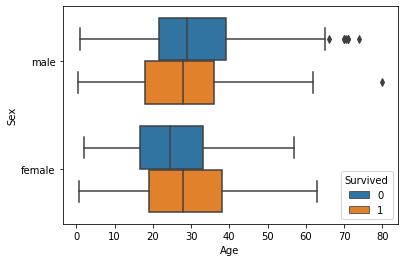

In [12]:
sns.boxplot(data['Age'], data['Sex'], hue=data['Survived'], orient='h');

In [13]:
data['SibSp'].nunique()

7

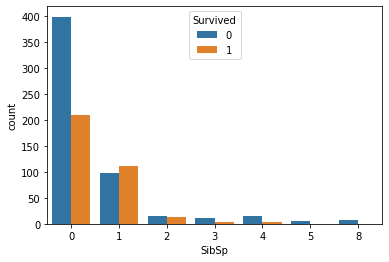

In [14]:
sns.countplot(data['SibSp'], hue=data['Survived']);

In [15]:
data['SibSp'] = data['SibSp'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2)

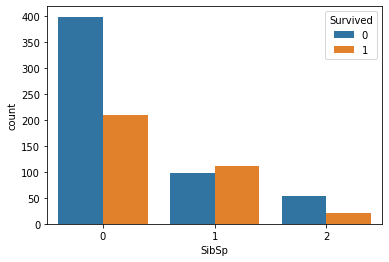

In [16]:
sns.countplot(data['SibSp'], hue=data['Survived']);

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
data['Ticket'].nunique()

681

In [19]:
data['Ticket'].isnull().sum()

0

In [20]:
data['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
CA 2144              6
347088               6
3101295              6
382652               5
S.O.C. 14879         5
113781               4
LINE                 4
2666                 4
W./C. 6608           4
347077               4
19950                4
17421                4
PC 17757             4
4133                 4
113760               4
349909               4
110413               3
347742               3
C.A. 34651           3
F.C.C. 13529         3
110152               3
239853               3
PC 17582             3
371110               3
35273                3
PC 17572             3
230080               3
                    ..
349257               1
113509               1
SOTON/O.Q. 392078    1
4136                 1
230434               1
12233                1
2671                 1
SOTON/OQ 392089      1
28664                1
349210               1
350035               1
347743               1
113800     

In [21]:
data.drop(['Ticket', 'PassengerId'], inplace=True, axis=1)

In [22]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
data['Parch'] = data['Parch'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2)

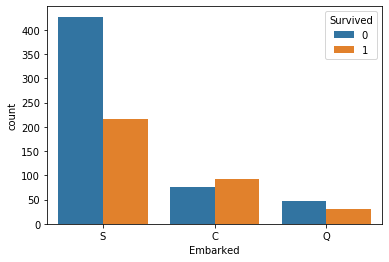

In [24]:
sns.countplot(data['Embarked'], hue=data['Survived']);

In [25]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

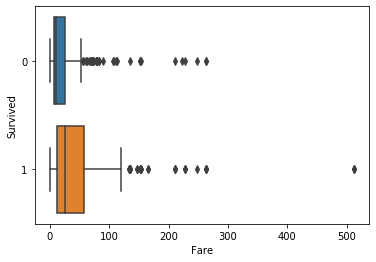

In [26]:
sns.boxplot(data['Fare'], data['Survived'], orient='h');

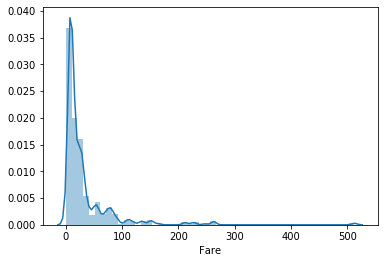

In [27]:
sns.distplot(data['Fare']);

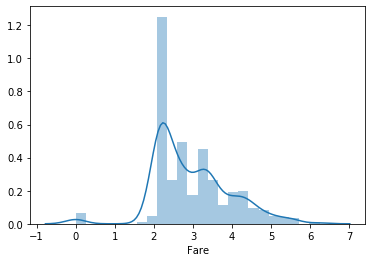

In [28]:
sns.distplot(np.log1p(data['Fare']));

In [29]:
data['Fare'] = np.log1p(data['Fare'])

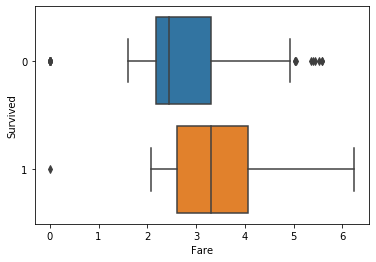

In [30]:
sns.boxplot(data['Fare'], data['Survived'], orient='h');

In [31]:
data.drop('Cabin', axis=1, inplace=True)

In [32]:
data.isnull().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [33]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [34]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


In [36]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [37]:
data['Embarked'] = data['Embarked'].map(data.groupby('Embarked')['Survived'].mean())

In [38]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mean())

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,2.110213,0.336957
1,1,1,1,38.0,1,0,4.280593,0.553571
2,1,3,1,26.0,0,0,2.188856,0.336957
3,1,1,1,35.0,1,0,3.990834,0.336957
4,0,3,0,35.0,0,0,2.202765,0.336957


In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
pipeline = Pipeline([('sc', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=1))])

In [42]:
cv = cross_val_score(estimator=pipeline, X=data.drop('Survived', axis=1), y=data['Survived'], cv=5)

In [43]:
cv.mean(), cv.std()

(0.7407474039705836, 0.03108734690834343)

In [44]:
for i in range(1, 51):
    pipeline = Pipeline([('sc', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i))])
    cv = cross_val_score(estimator=pipeline, X=data.drop('Survived', axis=1), y=data['Survived'], cv=5)
    print(i, cv.mean(), cv.std())

1 0.7407474039705836 0.03108734690834343
2 0.7845370944684829 0.020884770957772237
3 0.7958234788656023 0.026464606918354575
4 0.7980393554548624 0.015116925804934513
5 0.8081706880697018 0.02548985640127805
6 0.8036825831170937 0.02359083609810246
7 0.8014355339605439 0.024619370604588155
8 0.8059299159830158 0.023511928746667934
9 0.8036764479019158 0.023437311176566226
10 0.810380216661755 0.019711602739514094
11 0.8081266776533121 0.018451935767613073
12 0.8070031530750372 0.02594593217397914
13 0.8126275495276772 0.023010931583191115
14 0.8092315128766817 0.021967836434187447
15 0.8047685871308718 0.02608036173945378
16 0.8002614381866431 0.019607866585886567
17 0.7980268013151347 0.01795082728994106
18 0.8002551611167794 0.01450828647405735
19 0.8013535064882561 0.01143047924828209
20 0.8024772438485602 0.019822125527084098
21 0.8114472476112556 0.02262869912745214
22 0.8069528655887837 0.02375828187248777
23 0.8013473712730784 0.021490996402422826
24 0.8024332334321705 0.0280468

In [45]:
for i in range(2, 10):
    pipeline = DecisionTreeClassifier(max_depth=i)
    cv = cross_val_score(estimator=pipeline, X=data.drop('Survived', axis=1), y=data['Survived'], cv=5)
    print(i, cv.mean(), cv.std())

2 0.7733072037001376 0.018700760773741283
3 0.8091999147453336 0.011813222604665266
4 0.8036638228348453 0.02764997649663406
5 0.8171031712679007 0.021469712896561237
6 0.8148873656059837 0.019789712933304462
7 0.8103614563795066 0.017206127027570864
8 0.8036636100528162 0.02206595858832427
9 0.8047808575612272 0.023840528879106683


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {'max_depth': np.arange(2, 11), 'min_samples_split': np.arange(2, 11), 'max_features': np.arange(4, 8)}

In [49]:
cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params)

In [50]:
cv.fit(data.drop('Survived', axis=1), data['Survived'])

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([

In [51]:
cv.best_score_

0.8215488215488216

In [52]:
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1, 51)})

In [54]:
scaler = StandardScaler()

In [55]:
x = scaler.fit_transform(data.drop('Survived', axis=1))

In [56]:
cv.fit(x, data['Survived'])

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
cv.best_params_

{'n_neighbors': 8}

In [58]:
cv.best_score_

0.8114478114478114